In [18]:
# preprocess functions
from basic_functions import cust_dummies, custom_preprocess
from basic_functions import get_data_from_csv, feature_engineering, tts_custom, custom_smote
from basic_functions import custom_logreg, custom_knn, custom_nb, custom_svc, custom_rf, custom_stack
# for some reason the other functions won't load
from sklearn.metrics import confusion_matrix


In [19]:
df = get_data_from_csv()
df = feature_engineering(df)

/Users/burkhardtflemer/Desktop/neuefische/ds-ml-xente-fraud-detection-project/basic_functions.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['InOut'][dataframe['Amount'] < 0 ] = 1
/Users/burkhardtflemer/Desktop/neuefische/ds-ml-xente-fraud-detection-project/basic_functions.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['InOut'][dataframe['Amount'] >=0 ] = 0
/Users/burkhardtflemer/Desktop/neuefische/ds-ml-xente-fraud-detection-project/basic_functions.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [20]:
df.head()

,ProviderId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,InOut,difference,weekday,time_of_day
TransactionId,,,,,,,,,,
TransactionId_76871,6,airtime,3,1000,2,0,0.0,0.0,3,8329
TransactionId_73770,4,financial_services,2,20,2,0,1.0,0.0,3,8348
TransactionId_26203,6,airtime,3,500,2,0,0.0,0.0,3,9861
TransactionId_380,1,utility_bill,3,21800,2,0,0.0,1.0,3,12775
TransactionId_28195,4,financial_services,2,644,2,0,1.0,0.0,3,12861


In [21]:
X_train, X_test, y_train, y_test = tts_custom(df, RSEED = 42)

In [22]:
X_test.head()

,ProviderId,ProductCategory,ChannelId,Value,PricingStrategy,InOut,difference,weekday,time_of_day
TransactionId,,,,,,,,,
TransactionId_15258,4,airtime,5,1000,4,1.0,0.0,1,23080
TransactionId_36687,5,utility_bill,3,30441,2,0.0,1.0,4,28721
TransactionId_113440,4,financial_services,2,55,2,1.0,0.0,4,71746
TransactionId_3892,6,airtime,3,1000,2,0.0,0.0,2,54626
TransactionId_66712,5,financial_services,3,10000,2,0.0,0.0,3,61173


In [23]:
X_train_sm, y_train_sm = custom_smote(X_train, y_train, 42)

# sort test to match train
X_test = X_test[["ProviderId", "ProductCategory", "ChannelId", "PricingStrategy", 
        "weekday", "difference", "InOut", "Value", "time_of_day"]]

In [24]:
X_train.head()

,ProviderId,ProductCategory,ChannelId,Value,PricingStrategy,InOut,difference,weekday,time_of_day
TransactionId,,,,,,,,,
TransactionId_29751,4,financial_services,2,200,2,1.0,0.0,4,28699
TransactionId_114629,4,financial_services,2,40,2,1.0,0.0,0,41786
TransactionId_116446,4,financial_services,2,50,2,1.0,0.0,6,61735
TransactionId_32816,6,airtime,3,1000,2,0.0,0.0,0,65871
TransactionId_41661,6,airtime,3,2000,2,0.0,0.0,4,49474


In [25]:
cat_features = [
    "ProviderId", "ProductCategory", "ChannelId", "PricingStrategy", "InOut", "difference", "weekday"
    ]
num_features = ["Value", "time_of_day"]

X_train_sm_sc, X_test_sc = custom_preprocess(X_train_sm, X_test, nf=num_features)

In [26]:
# Make sure types are the same for train and test (can certainly be done more elegantly from the start)
X_test_sc = X_test_sc.astype({"difference": "object", "InOut": "object"})

In [27]:
X_train_sm_sc.dtypes

ProviderId          object
ProductCategory     object
ChannelId           object
PricingStrategy     object
weekday             object
difference          object
InOut               object
Value              float64
time_of_day        float64
dtype: object

In [28]:
X_test_sc.dtypes

ProviderId          object
ProductCategory     object
ChannelId           object
PricingStrategy     object
weekday             object
difference          object
InOut               object
Value              float64
time_of_day        float64
dtype: object

In [29]:
cat_features

['ProviderId',
 'ProductCategory',
 'ChannelId',
 'PricingStrategy',
 'InOut',
 'difference',
 'weekday']

In [30]:
X_train_sm_sc, cat_features_dummies = cust_dummies(X_train_sm_sc, cat_features)
X_test_sc, cat_features = cust_dummies(X_test_sc, cat_features)

In [31]:
X_test_sc.columns

Index(['Value', 'time_of_day', 'ProviderId_2', 'ProviderId_3', 'ProviderId_4',
       'ProviderId_5', 'ProviderId_6', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_2', 'ChannelId_3',
       'ChannelId_5', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4', 'InOut_1.0', 'difference_1.0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [32]:
X_train_sm_sc.columns

Index(['Value', 'time_of_day', 'ProviderId_2', 'ProviderId_3', 'ProviderId_4',
       'ProviderId_5', 'ProviderId_6', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_2', 'ChannelId_3',
       'ChannelId_5', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4', 'InOut_1.0', 'difference_1.0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [33]:

y_train_sm_lr, y_test_lr = custom_logreg(X_train_sm_sc, X_test_sc, y_train_sm, y_test)
confusion_matrix(y_test, y_test_lr)


/Users/burkhardtflemer/Desktop/neuefische/ds-ml-xente-fraud-detection-project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[23718,   150],
       [    2,    46]])

In [34]:

y_train_sm_nb, y_test_nb = custom_nb(X_train_sm_sc, X_test_sc, y_train_sm, y_test)

In [35]:
confusion_matrix(y_test, y_test_nb)

array([[18327,  5541],
       [    1,    47]])

In [36]:

y_train_sm_rf, y_test_rf = custom_rf(X_train_sm_sc, X_test_sc, y_train_sm, y_test)

In [37]:
confusion_matrix(y_test, y_test_rf)

array([[23845,    23],
       [    7,    41]])

In [38]:

y_train_sm_knn, y_test_knn = custom_knn(X_train_sm_sc, X_test_sc, y_train_sm, y_test)
confusion_matrix(y_test, y_test_knn)


array([[23792,    76],
       [   15,    33]])

In [39]:

y_train_sm_svc, y_test_svc = custom_svc(X_train_sm_sc, X_test_sc, y_train_sm, y_test)
confusion_matrix(y_test, y_test_svc)


array([[23739,   129],
       [    4,    44]])

In [40]:

y_train_sm_stack, y_test_stack = custom_knn(X_train_sm_sc, X_test_sc, y_train_sm, y_test)
confusion_matrix(y_test, y_test_stack)

array([[23792,    76],
       [   15,    33]])

In [41]:
from sklearn.metrics import f1_score, matthews_corrcoef
###########################
#  Predict on test data   #
###########################

# Calculating the accuracy for the LogisticRegression Classifier 
print('Cross validation scores Logistic Regression:')
print('-------------------------')
print("F1-score: {:.2f}".format(f1_score(y_test, y_test_lr)))
print("MCC: {:.2f}".format(matthews_corrcoef(y_test, y_test_lr)))

# Calculating the accuracy for the RandomForest Classifier 
print('Cross validation scores Random Forest:')
print('-------------------------')
print("F1-score: {:.2f}".format(f1_score(y_test, y_test_rf)))
print("MCC: {:.2f}".format(matthews_corrcoef(y_test, y_test_rf)))

# Calculating the accuracy for the KNN Classifier 
print('Cross validation scores KNN:')
print('-------------------------')
print("F1-score: {:.2f}".format(f1_score(y_test, y_test_knn)))
print("MCC: {:.2f}".format(matthews_corrcoef(y_test, y_test_knn)))

# Calculating the accuracy for the SVM Classifier 
print('Cross validation scores SVM:')
print('-------------------------')
print("F1-score: {:.2f}".format(f1_score(y_test, y_test_svc)))
print("MCC: {:.2f}".format(matthews_corrcoef(y_test, y_test_svc)))

# Calculating the accuracy for the Naive Bayes Classifier 
print('Cross validation scores Naive Bayes:')
print('-------------------------')
print("F1-score: {:.2f}".format(f1_score(y_test, y_test_nb)))
print("MCC: {:.2f}".format(matthews_corrcoef(y_test, y_test_nb)))

# Calculating the accuracy for the stacking Classifier 
print('Cross validation scores Stack:')
print('-------------------------')
print("F1-score: {:.2f}".format(f1_score(y_test, y_test_stack)))
print("MCC: {:.2f}".format(matthews_corrcoef(y_test, y_test_stack)))

Cross validation scores Logistic Regression:
-------------------------
F1-score: 0.38
MCC: 0.47
Cross validation scores Random Forest:
-------------------------
F1-score: 0.73
MCC: 0.74
Cross validation scores KNN:
-------------------------
F1-score: 0.42
MCC: 0.45
Cross validation scores SVM:
-------------------------
F1-score: 0.40
MCC: 0.48
Cross validation scores Naive Bayes:
-------------------------
F1-score: 0.02
MCC: 0.08
Cross validation scores Stack:
-------------------------
F1-score: 0.42
MCC: 0.45


some old code which I may want to reactivate again

`# Initiate OneHotEncoder()  
ohe = OneHotEncoder(handle_unknown='ignore')  
# run ohe  
X_train = ohe.fit_transform(X_train[cf])
X_test[cf] = ohe.transform(X_test[cf])
    
# transfrom sparse to dense
X_train = X_train.todense() 
X_test = X_test.todense()`


### As learning a model takes a lot of time, I think it would be useful to save them to file so that they can be loaded later on for prediction
#### examplecode, save the model to disk
from [here](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)  

`filename = 'finalized_model.sav'  

joblib.dump(model, filename)`  
 
#### some time later...
 
#### load the model from disk

`loaded_model = joblib.load(filename)  

result = loaded_model.score(X_test, Y_test)  

print(result)`  

In [85]:
def get_all_data_from_csv():
    """df import with some alterations we discovered so far
    Parses dates, drops 'CountryCode' and 'CurrencyCode' columns, sets appropriate dtypes.
    Returns:
        DataFrame: A dataframe with the imported data
    """

    import pandas as pd
    return pd.read_csv(
        'data/xente/training.csv', parse_dates=['TransactionStartTime'],  
        index_col='TransactionId')
import pandas as pd
tmpdf = get_all_data_from_csv()

In [69]:

tmpdf["mvg_avg_fr"] = df.FraudResult.rolling(14).mean()
tmpdf["mvg_avg_v"] = df.Value.rolling(14).mean()
import seaborn as sns

#sns.barplot(data=tmpdf, x="Start")
tmpdf["day"]

,ProviderId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,mvg_avg_fr,mvg_avg_v
TransactionId,,,,,,,,,,
TransactionId_76871,ProviderId_6,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,NaN,NaN
TransactionId_73770,ProviderId_4,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,NaN,NaN
TransactionId_26203,ProviderId_6,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,NaN,NaN
TransactionId_380,ProviderId_1,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,NaN,NaN
TransactionId_28195,ProviderId_4,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,NaN,NaN


(array([17850., 17866., 17880., 17897., 17911., 17928., 17942.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

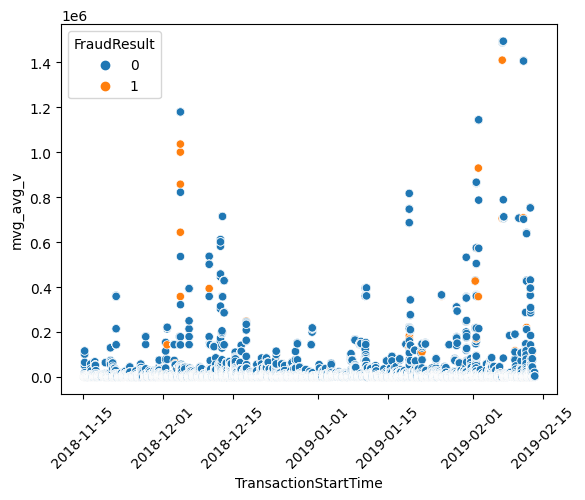

In [70]:
import matplotlib.pyplot as plt
sns.scatterplot(data=tmpdf, x="TransactionStartTime", y="mvg_avg_v", hue = "FraudResult")
plt.xticks(rotation = 45)

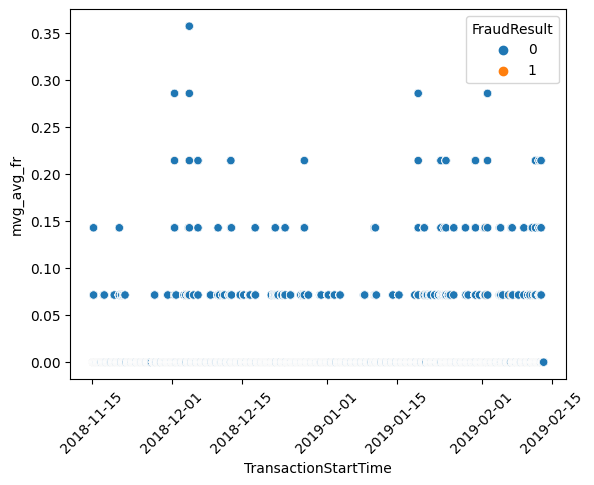

In [80]:
sns.scatterplot(data=tmpdf, x="TransactionStartTime", y="mvg_avg_fr", hue = "FraudResult")
plt.xticks(rotation = 45);

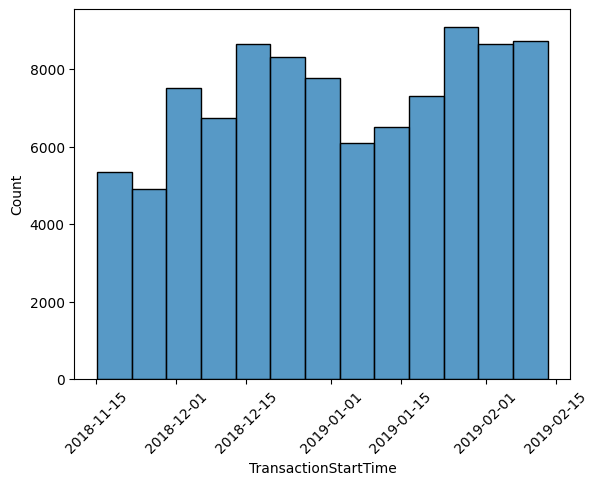

In [79]:
sns.histplot(data=tmpdf, x="TransactionStartTime", bins=13)
plt.xticks(rotation = 45);

In [75]:
tmpdf.TransactionStartTime.dt.date.nunique()

91

In [113]:
tmp = tmpdf[tmpdf['AccountId'].isin(list(tmpdf[tmpdf.FraudResult == 1].AccountId))]
tmp.reset_index(inplace=True)
tmp
# TODO: group number of CustomerIds for each account and assign new column

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
1,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
2,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15 03:45:13+00:00,2,0
3,TransactionId_33857,BatchId_126394,AccountId_4841,SubscriptionId_3829,CustomerId_3052,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-40.0,40,2018-11-15 04:32:42+00:00,2,0
4,TransactionId_64044,BatchId_117733,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-10.0,10,2018-11-15 04:54:18+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37796,TransactionId_68851,BatchId_100900,AccountId_4841,SubscriptionId_3829,CustomerId_539,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-140.0,140,2019-02-13 09:50:34+00:00,2,0
37797,TransactionId_38907,BatchId_92168,AccountId_4841,SubscriptionId_3829,CustomerId_960,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 09:52:49+00:00,2,0
37798,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
37799,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
